

#### Name: Amirhossein Safari
#### Student No.: 14014121

### 1) Import Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

### 2) Loading Dataset (10 points)

In this notebook, you will use `MNIST` dataset to train your GAN. You can see more information about this dataset [here](http://yann.lecun.com/exdb/mnist/). This dataset is a 10 class dataset. It contains 60000 grayscale images (50000 for train and 10000 for test or validation) each with shape (3, 28, 28). Every image has a corresponding label which is a number in range 0 to 9.

In [2]:
# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 133679660.60it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 103446365.35it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38344716.41it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 2004685.76it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

################# Problem 01 (5 pts) ################

# define hyper parameters
batch_size = 128
d_lr = 0.001
g_lr = 0.001
n_epochs = 100
####################### End ########################
z_dim = 100

In [4]:

################ Problem 02 (5 pts) ################
# Define Dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
####################### End ########################
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### 3) Defining Network (30 points)
At this stage, you should define a network that improves your GAN training and prevents problems such as mode collapse and vanishing gradients.

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.discriminator = nn.Sequential(
            ################ Problem 03 (15 pts) ################
            # use linear or convolutional layer
            # use arbitrary techniques to stabilize training
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()

            ####################### End ########################
        )

    def forward(self, x):
        return self.discriminator(x)


class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.generator = nn.Sequential(
            ################ Problem 04 (15 pts) ################
            # use linear or convolutional layer
            # use arbitrary techniques to stabilize training
            nn.Linear(100, 128 * 7 * 7),
            nn.BatchNorm1d(128 * 7 * 7),
            nn.ReLU(),
            nn.Unflatten(1, (128, 7, 7)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()

            ####################### End ########################
        )

    def forward(self, z):
        return self.generator(z)


### 4) Train the Network
At this step, you are going to train your network.

In [6]:
################ Problem 05 (5 pts) ################
# Create instances of modules (discriminator and generator)
# don't forget to put your models on device
discriminator = Discriminator().to(device)
generator = Generator().to(device)
####################### End ########################

In [7]:
print(discriminator)

Discriminator(
  (discriminator): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=6272, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [8]:
print(generator)

Generator(
  (generator): Sequential(
    (0): Linear(in_features=100, out_features=6272, bias=True)
    (1): BatchNorm1d(6272, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Unflatten(dim=1, unflattened_size=(128, 7, 7))
    (4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (8): Tanh()
  )
)


In [9]:
################ Problem 06 (5 pts) ################
# Define two optimizer for discriminator and generator
d_optimizer = optim.Adam(discriminator.parameters(), lr=d_lr)
g_optimizer = optim.Adam(generator.parameters(), lr=g_lr)
####################### End ########################

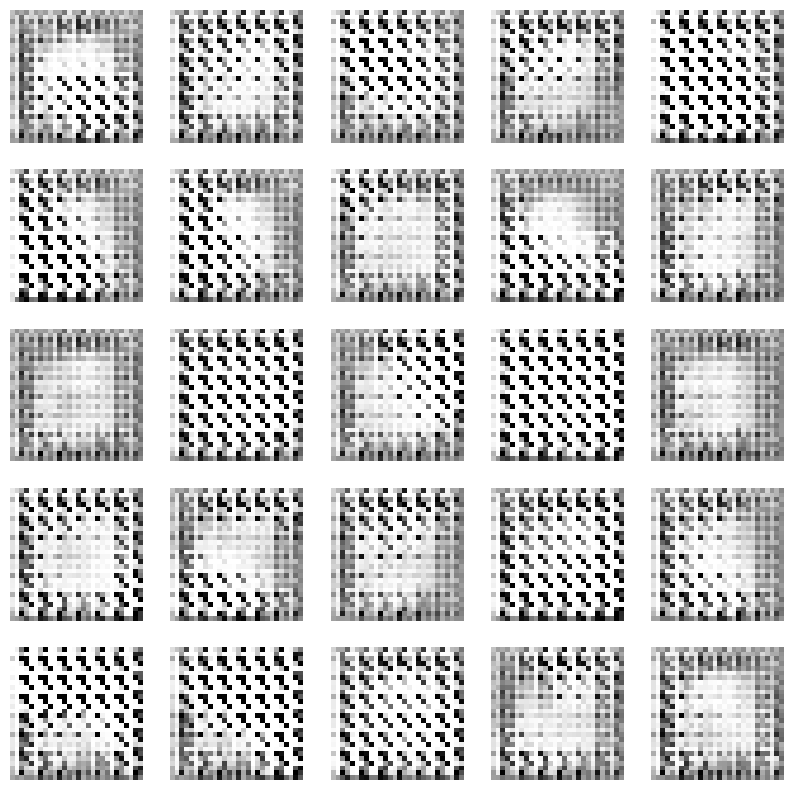

epoch: 1 	 discriminator last batch loss: 0.0014936182415112853 	 generator last batch loss: 8.818190574645996
epoch: 2 	 discriminator last batch loss: 0.004988376051187515 	 generator last batch loss: 8.860452651977539
epoch: 3 	 discriminator last batch loss: 0.016630392521619797 	 generator last batch loss: 6.548514366149902
epoch: 4 	 discriminator last batch loss: 0.014704987406730652 	 generator last batch loss: 6.410029888153076
epoch: 5 	 discriminator last batch loss: 0.010596295818686485 	 generator last batch loss: 5.984316825866699
epoch: 6 	 discriminator last batch loss: 0.006453583016991615 	 generator last batch loss: 7.0625762939453125
epoch: 7 	 discriminator last batch loss: 0.010279814712703228 	 generator last batch loss: 6.732135772705078
epoch: 8 	 discriminator last batch loss: 0.015255951322615147 	 generator last batch loss: 5.682052135467529
epoch: 9 	 discriminator last batch loss: 0.015241555869579315 	 generator last batch loss: 5.661228179931641
epoch: 1

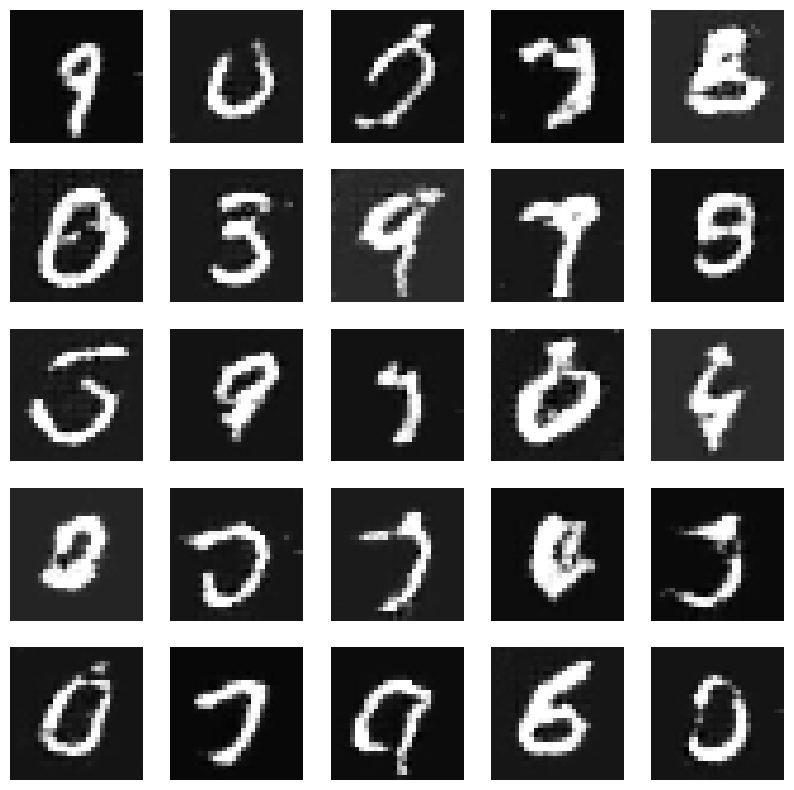

epoch: 11 	 discriminator last batch loss: 0.01805180497467518 	 generator last batch loss: 6.1920166015625
epoch: 12 	 discriminator last batch loss: 0.01761157065629959 	 generator last batch loss: 6.539189338684082
epoch: 13 	 discriminator last batch loss: 0.06274031847715378 	 generator last batch loss: 4.730540752410889
epoch: 14 	 discriminator last batch loss: 0.02800515666604042 	 generator last batch loss: 5.769575119018555
epoch: 15 	 discriminator last batch loss: 0.05733136087656021 	 generator last batch loss: 7.251976013183594
epoch: 16 	 discriminator last batch loss: 0.019407473504543304 	 generator last batch loss: 6.3152666091918945
epoch: 17 	 discriminator last batch loss: 0.04365783929824829 	 generator last batch loss: 6.890794277191162
epoch: 18 	 discriminator last batch loss: 0.02938678115606308 	 generator last batch loss: 6.416749954223633
epoch: 19 	 discriminator last batch loss: 0.029833892360329628 	 generator last batch loss: 6.27478551864624
epoch: 20 

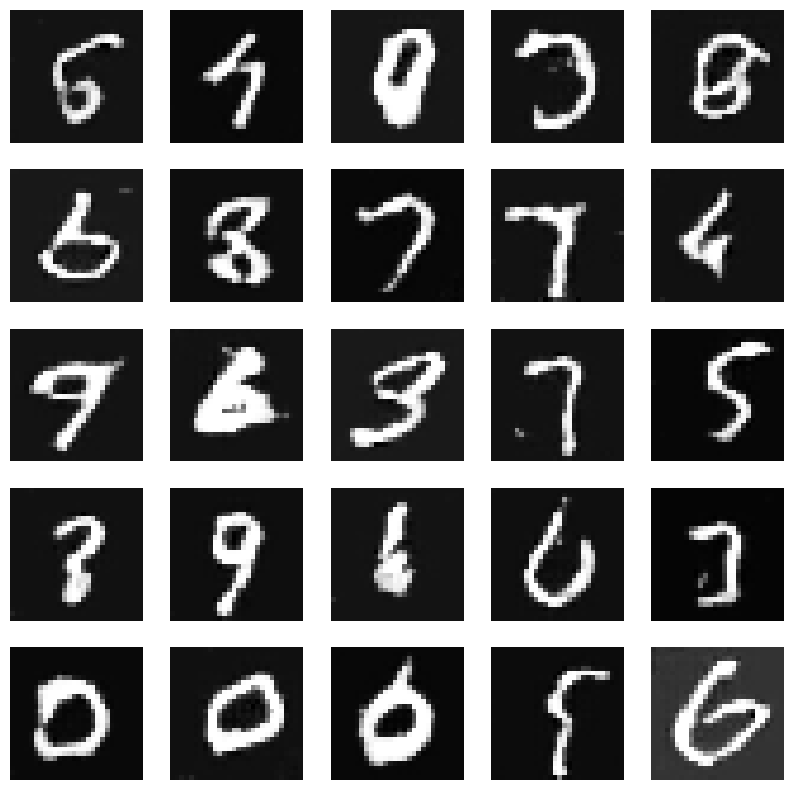

epoch: 21 	 discriminator last batch loss: 0.028989354148507118 	 generator last batch loss: 6.488915920257568
epoch: 22 	 discriminator last batch loss: 0.014591424725949764 	 generator last batch loss: 7.157055854797363
epoch: 23 	 discriminator last batch loss: 0.026382507756352425 	 generator last batch loss: 6.2889533042907715
epoch: 24 	 discriminator last batch loss: 0.028300702571868896 	 generator last batch loss: 5.97145938873291
epoch: 25 	 discriminator last batch loss: 0.01482373382896185 	 generator last batch loss: 8.167742729187012
epoch: 26 	 discriminator last batch loss: 0.022136639803647995 	 generator last batch loss: 6.065427303314209
epoch: 27 	 discriminator last batch loss: 0.2045394331216812 	 generator last batch loss: 3.435742139816284
epoch: 28 	 discriminator last batch loss: 0.023979738354682922 	 generator last batch loss: 5.049050331115723
epoch: 29 	 discriminator last batch loss: 0.05247131735086441 	 generator last batch loss: 6.938199996948242
epoch

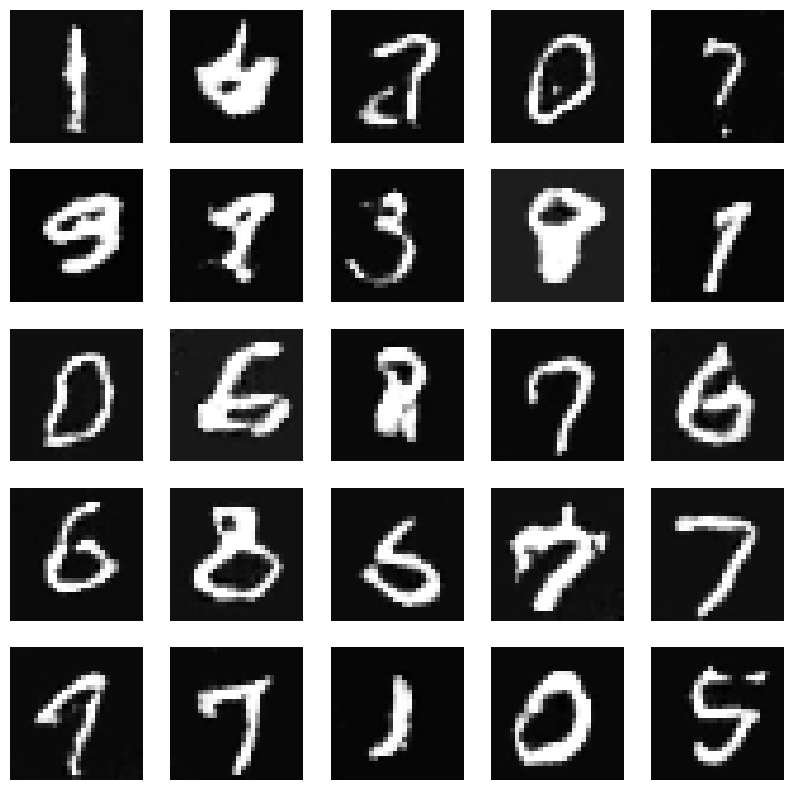

epoch: 31 	 discriminator last batch loss: 0.022778267040848732 	 generator last batch loss: 6.795853614807129
epoch: 32 	 discriminator last batch loss: 0.0363583080470562 	 generator last batch loss: 5.443351745605469
epoch: 33 	 discriminator last batch loss: 0.08310113102197647 	 generator last batch loss: 6.4720611572265625
epoch: 34 	 discriminator last batch loss: 0.016320273280143738 	 generator last batch loss: 4.856380462646484
epoch: 35 	 discriminator last batch loss: 0.06064603477716446 	 generator last batch loss: 6.000730037689209
epoch: 36 	 discriminator last batch loss: 0.0763820931315422 	 generator last batch loss: 5.507464408874512
epoch: 37 	 discriminator last batch loss: 0.014758726581931114 	 generator last batch loss: 8.138152122497559
epoch: 38 	 discriminator last batch loss: 0.03318279981613159 	 generator last batch loss: 5.434300422668457
epoch: 39 	 discriminator last batch loss: 1.0691713094711304 	 generator last batch loss: 4.18314266204834
epoch: 40 

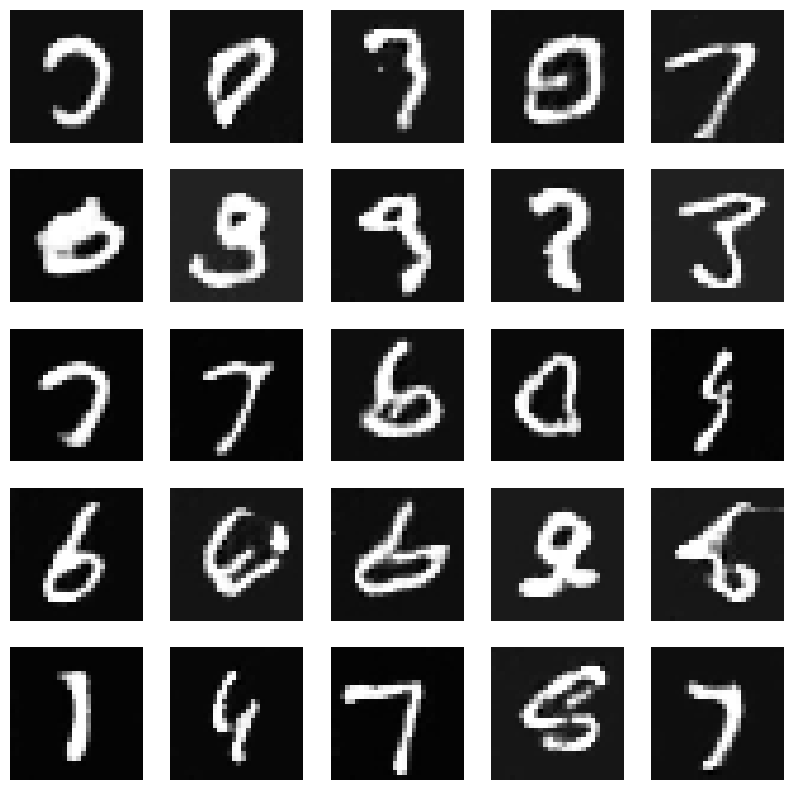

epoch: 41 	 discriminator last batch loss: 0.01360073871910572 	 generator last batch loss: 4.581631183624268
epoch: 42 	 discriminator last batch loss: 0.012359501793980598 	 generator last batch loss: 6.153843879699707
epoch: 43 	 discriminator last batch loss: 0.017664670944213867 	 generator last batch loss: 6.045958518981934
epoch: 44 	 discriminator last batch loss: 0.05371221899986267 	 generator last batch loss: 4.623004913330078
epoch: 45 	 discriminator last batch loss: 0.05180317535996437 	 generator last batch loss: 6.238760948181152
epoch: 46 	 discriminator last batch loss: 0.008407048881053925 	 generator last batch loss: 7.530576229095459
epoch: 47 	 discriminator last batch loss: 0.10452790558338165 	 generator last batch loss: 7.55587911605835
epoch: 48 	 discriminator last batch loss: 0.020911650732159615 	 generator last batch loss: 7.494503021240234
epoch: 49 	 discriminator last batch loss: 0.020772816613316536 	 generator last batch loss: 6.032962799072266
epoch:

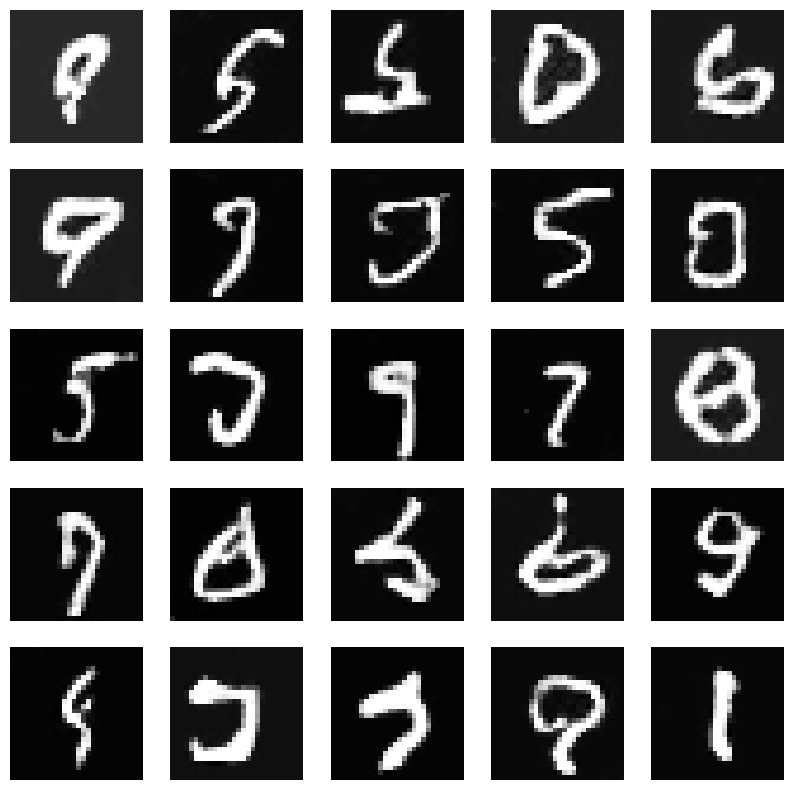

epoch: 51 	 discriminator last batch loss: 0.017348546534776688 	 generator last batch loss: 6.256641387939453
epoch: 52 	 discriminator last batch loss: 0.27038440108299255 	 generator last batch loss: 9.061744689941406
epoch: 53 	 discriminator last batch loss: 0.012280729599297047 	 generator last batch loss: 6.68869686126709
epoch: 54 	 discriminator last batch loss: 0.01445400808006525 	 generator last batch loss: 7.30643367767334
epoch: 55 	 discriminator last batch loss: 0.11880718916654587 	 generator last batch loss: 5.980544090270996
epoch: 56 	 discriminator last batch loss: 0.01707741618156433 	 generator last batch loss: 9.099855422973633
epoch: 57 	 discriminator last batch loss: 0.01390863861888647 	 generator last batch loss: 7.071203231811523
epoch: 58 	 discriminator last batch loss: 0.07359171658754349 	 generator last batch loss: 5.370082855224609
epoch: 59 	 discriminator last batch loss: 0.008048763498663902 	 generator last batch loss: 9.121952056884766
epoch: 60

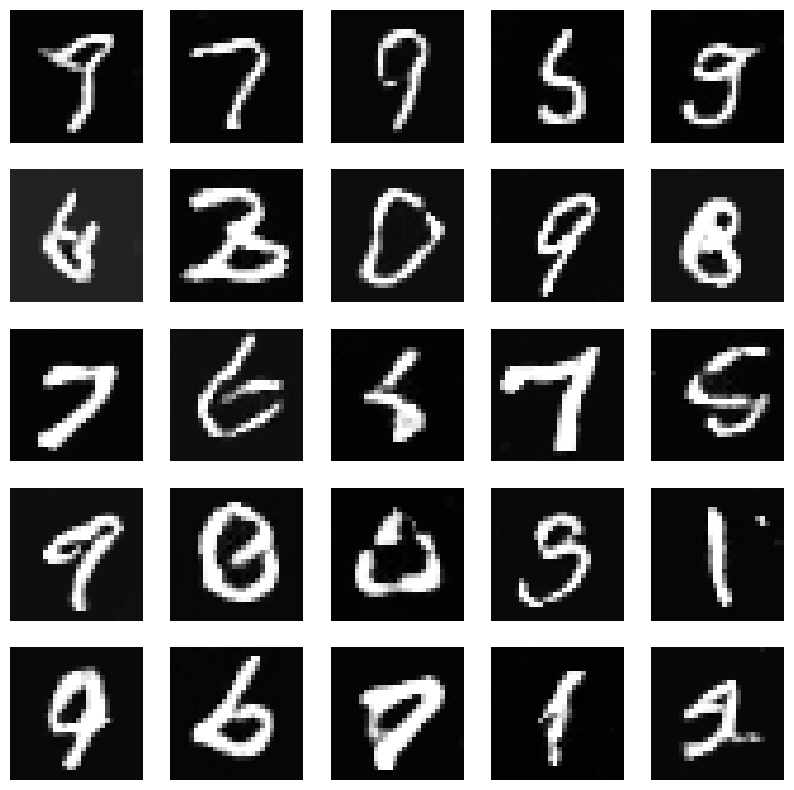

epoch: 61 	 discriminator last batch loss: 0.0825558602809906 	 generator last batch loss: 6.411705017089844
epoch: 62 	 discriminator last batch loss: 0.02986275404691696 	 generator last batch loss: 7.420509338378906
epoch: 63 	 discriminator last batch loss: 0.03280344232916832 	 generator last batch loss: 8.83124828338623
epoch: 64 	 discriminator last batch loss: 0.061726197600364685 	 generator last batch loss: 6.6493964195251465
epoch: 65 	 discriminator last batch loss: 0.02135656028985977 	 generator last batch loss: 6.403103828430176
epoch: 66 	 discriminator last batch loss: 0.04110672324895859 	 generator last batch loss: 4.961319923400879
epoch: 67 	 discriminator last batch loss: 0.021075470373034477 	 generator last batch loss: 7.887779235839844
epoch: 68 	 discriminator last batch loss: 0.051331885159015656 	 generator last batch loss: 6.811182975769043
epoch: 69 	 discriminator last batch loss: 0.24276012182235718 	 generator last batch loss: 6.105223655700684
epoch: 7

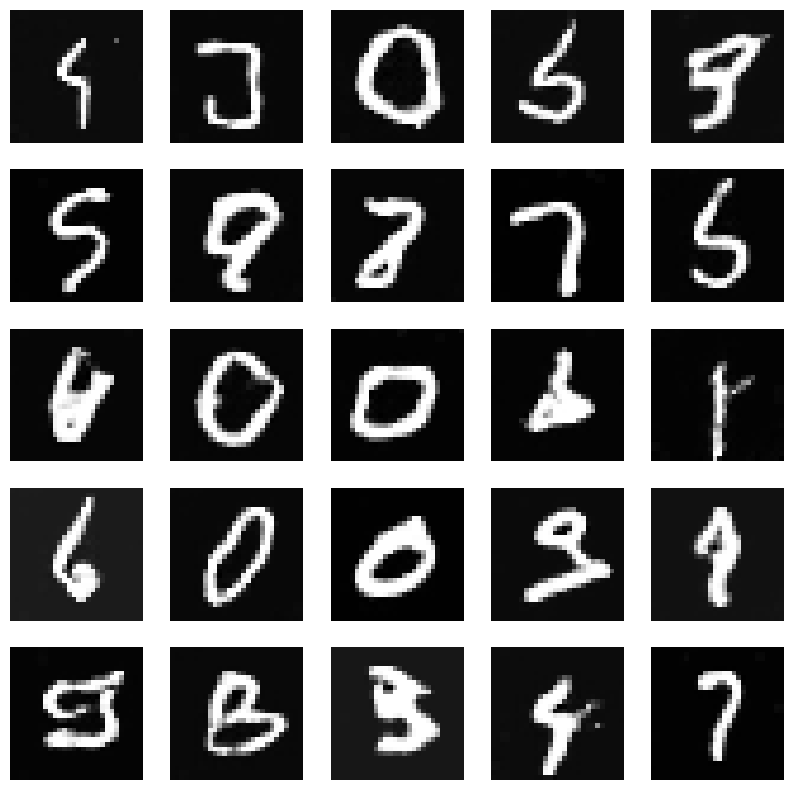

epoch: 71 	 discriminator last batch loss: 0.03385511040687561 	 generator last batch loss: 7.147780418395996
epoch: 72 	 discriminator last batch loss: 0.04535568878054619 	 generator last batch loss: 8.779460906982422
epoch: 73 	 discriminator last batch loss: 0.02084890380501747 	 generator last batch loss: 5.560207366943359
epoch: 74 	 discriminator last batch loss: 0.02700563333928585 	 generator last batch loss: 6.38836669921875
epoch: 75 	 discriminator last batch loss: 0.017190923914313316 	 generator last batch loss: 7.540996551513672
epoch: 76 	 discriminator last batch loss: 0.057293929159641266 	 generator last batch loss: 6.577422618865967
epoch: 77 	 discriminator last batch loss: 0.04626496881246567 	 generator last batch loss: 8.051291465759277
epoch: 78 	 discriminator last batch loss: 0.008106838911771774 	 generator last batch loss: 7.038634300231934
epoch: 79 	 discriminator last batch loss: 0.03461763262748718 	 generator last batch loss: 7.2635955810546875
epoch: 

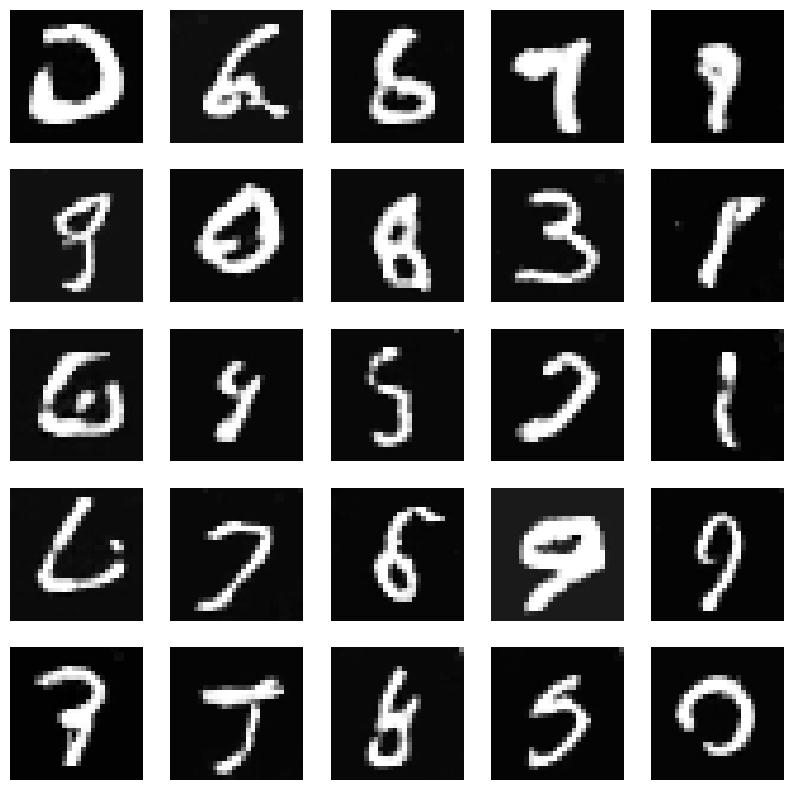

epoch: 81 	 discriminator last batch loss: 0.021360116079449654 	 generator last batch loss: 6.191706657409668
epoch: 82 	 discriminator last batch loss: 0.01897871308028698 	 generator last batch loss: 6.572112560272217
epoch: 83 	 discriminator last batch loss: 0.014734912663698196 	 generator last batch loss: 6.295656204223633
epoch: 84 	 discriminator last batch loss: 0.07206415385007858 	 generator last batch loss: 5.433550834655762
epoch: 85 	 discriminator last batch loss: 0.07985863089561462 	 generator last batch loss: 4.795619487762451
epoch: 86 	 discriminator last batch loss: 0.093702033162117 	 generator last batch loss: 7.45955228805542
epoch: 87 	 discriminator last batch loss: 0.0509493425488472 	 generator last batch loss: 7.313943862915039
epoch: 88 	 discriminator last batch loss: 0.03865358233451843 	 generator last batch loss: 6.859453201293945
epoch: 89 	 discriminator last batch loss: 0.020267728716135025 	 generator last batch loss: 7.115342617034912
epoch: 90 	

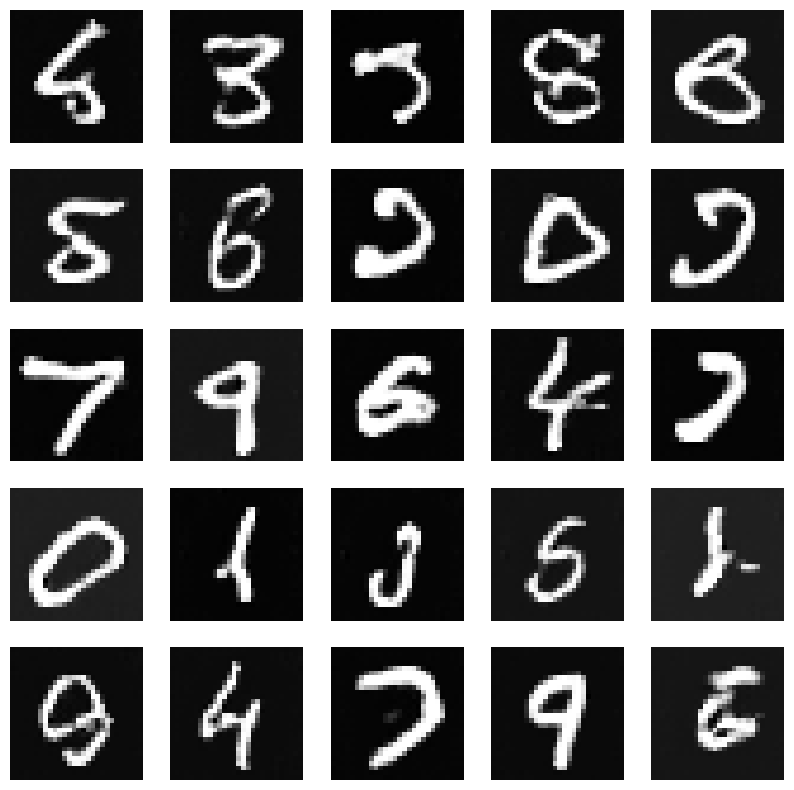

epoch: 91 	 discriminator last batch loss: 0.10949698090553284 	 generator last batch loss: 5.709543228149414
epoch: 92 	 discriminator last batch loss: 0.0478622131049633 	 generator last batch loss: 5.408550262451172
epoch: 93 	 discriminator last batch loss: 0.018877124413847923 	 generator last batch loss: 8.905807495117188
epoch: 94 	 discriminator last batch loss: 0.02654469572007656 	 generator last batch loss: 6.7215375900268555
epoch: 95 	 discriminator last batch loss: 0.03703569620847702 	 generator last batch loss: 6.917496681213379
epoch: 96 	 discriminator last batch loss: 0.031227868050336838 	 generator last batch loss: 8.267705917358398
epoch: 97 	 discriminator last batch loss: 0.0190703347325325 	 generator last batch loss: 7.4802045822143555
epoch: 98 	 discriminator last batch loss: 0.03301422670483589 	 generator last batch loss: 8.166695594787598
epoch: 99 	 discriminator last batch loss: 0.0603550560772419 	 generator last batch loss: 6.360706329345703
epoch: 10

In [10]:
plot_frequency = 10

d_losses = []
g_losses = []

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):

        ################ Problem 07 (15 pts) ################
        # Put your inputs on device
        images = images.to(device)
        labels = labels.to(device)
        z = torch.randn(images.size(0), z_dim).to(device)

        ####################### End ########################

        ################ Problem 08 (10 pts) ################
        # Calculate discriminator loss and update it
        discriminator.zero_grad()

        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        real_output = discriminator(images)
        real_loss = F.binary_cross_entropy(real_output, real_labels)

        fake_images = generator(z)
        fake_output = discriminator(fake_images.detach())
        fake_loss = F.binary_cross_entropy(fake_output, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        d_optimizer.step()

        ####################### End ########################

        ################ Problem 09 (10 pts) ################
        # Calculate generator loss and update it
        generator.zero_grad()

        fake_output = discriminator(fake_images)
        g_loss = F.binary_cross_entropy(fake_output, real_labels)

        g_loss.backward()
        g_optimizer.step()

        ####################### End ########################

    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    ################ Problem 10 (10 pts) ################
    # Plot some of the generated pictures based on plot frequency variable
    if (epoch % plot_frequency == 0):
        generated_images = generator(torch.randn(25, z_dim).to(device)).detach()
        generated_images = generated_images.view(-1, 28, 28).cpu()

        plt.figure(figsize=(10, 10))
        for j in range(25):
            plt.subplot(5, 5, j+1)
            plt.imshow(generated_images[j], cmap='gray')
            plt.axis('off')
        plt.show()

    ####################### End ########################

    print("epoch: {} \t discriminator last batch loss: {} \t generator last batch loss: {}".format(epoch + 1,
                                                                                                    d_loss.item(),
                                                                                                    g_loss.item())
    )

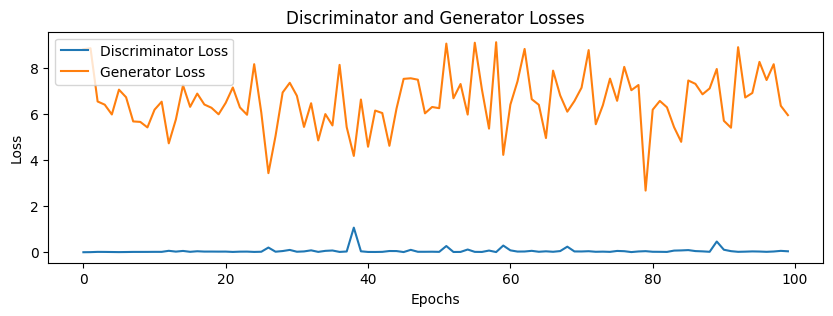

In [11]:
import matplotlib.pyplot as plt

# Plot discriminator loss
plt.plot(range(n_epochs), d_losses, label='Discriminator Loss')

# Plot generator loss
plt.plot(range(n_epochs), g_losses, label='Generator Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses')
plt.legend()
plt.show()

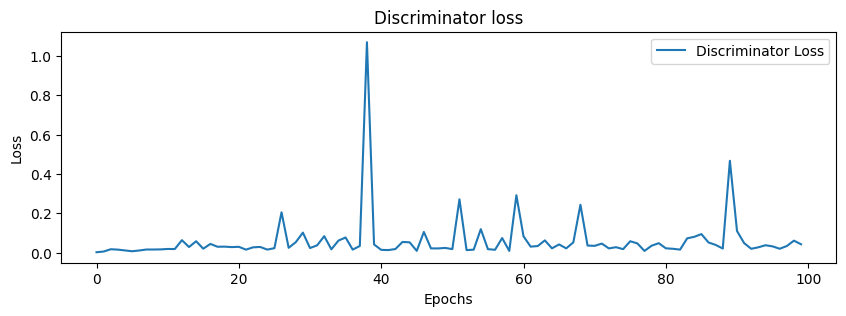

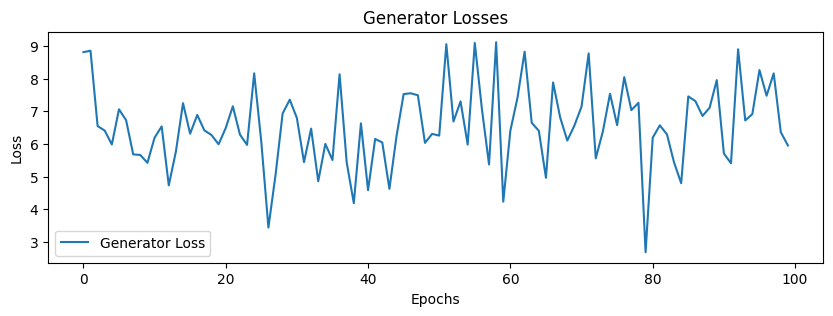

In [12]:
import matplotlib.pyplot as plt

# Plot discriminator loss
plt.plot(range(n_epochs), d_losses, label='Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator loss')
plt.legend()
plt.show()

# Plot generator loss
plt.plot(range(n_epochs), g_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Generator Losses')
plt.legend()
plt.show()


### 5) Save Generator
Save your final generator parameters. Upload it with your other files.

In [13]:
################ Problem 11 (5 pts) ################
# save state dict of your generator
torch.save(generator.state_dict(), 'generator.pth')
####################### End ########################